# <center> **FFT with DeepSeek**

Fréquence dominante: 50.0 Hz
Période: 0.02 secondes


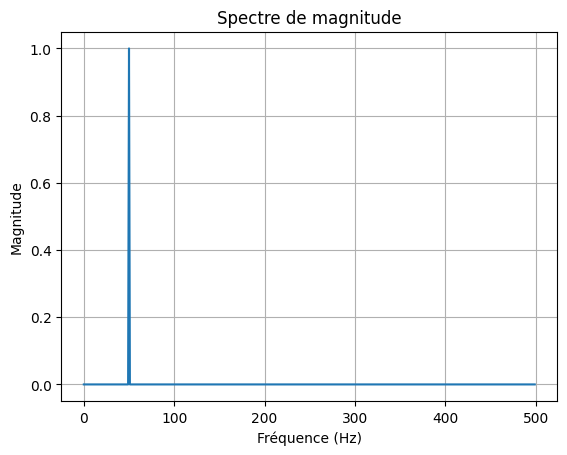

In [1]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Exemple de signal
fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 1.0 / fs  # Période d'échantillonnage
t = np.linspace(0.0, 1.0, fs, endpoint=False)  # Temps
f0 = 50  # Fréquence du signal (Hz)
signal = np.sin(2.0 * np.pi * f0 * t)  # Signal sinusoïdal

# Calcul de la FFT
N = len(signal)
yf = fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]  # Fréquences correspondantes

# Trouver la fréquence dominante (en ignorant la composante DC)
magnitude = 2.0/N * np.abs(yf[:N//2])
dominant_frequency = xf[np.argmax(magnitude[1:]) + 1]  # Ignorer la composante DC

# Calculer la période
period = 1.0 / dominant_frequency

print(f"Fréquence dominante: {dominant_frequency} Hz")
print(f"Période: {period} secondes")

# Visualisation
plt.plot(xf, magnitude)
plt.title('Spectre de magnitude')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

**Objectif du code**<br>
Le but de ce code est de déterminer la période d'un signal en utilisant la Transformée de Fourier Rapide (FFT). La FFT est un outil mathématique qui permet de décomposer un signal en ses fréquences constitutives. En trouvant la fréquence dominante, on peut ensuite calculer la période du signal.

1. <code>fs = 1000</code> : La fréquence d'échantillonnage est fixée à 1000 Hz. Cela signifie que le signal est échantillonné 1000 fois par seconde.

2. <code>T = 1.0 / fs</code> : La période d'échantillonnage est l'inverse de la fréquence d'échantillonnage.<br> Ici, 
$ T=1/1000=0.001=0.001$ seconde.

3. <code>t = np.linspace(0.0, 1.0, fs, endpoint=False)</code> : On crée un tableau de temps t allant de 0 à 1 seconde, avec fs points. endpoint=False exclut le point final pour éviter de dupliquer le premier point.

4. <code>f0 = 50</code> : La fréquence du signal est fixée à 50 Hz. C'est la fréquence du signal sinusoïdal que nous allons analyser.

5. <code>signal = np.sin(2.0 * np.pi * f0 * t)</code> : On génère un signal sinusoïdal de fréquence 
$f0=50$ Hz. La formule $sin(2 \pi f t)$ est utilisée pour créer une sinusoïde.

6. <code>N = len(signal)</code> : On détermine la longueur du signal (ici, $N=1000$).

7. <code>yf = fft(signal)</code> : On calcule la FFT du signal. La FFT retourne un tableau de nombres complexes représentant les amplitudes et phases des fréquences constitutives du signal.

8. <code>xf = np.fft.fftfreq(N, T)[:N//2]</code> : On calcule les fréquences correspondantes à la FFT.<br> <code>np.fft.fftfreq</code> génère les fréquences associées à chaque point de la FFT. On ne garde que la première moitié des fréquences <code>([:N//2])</code> car la FFT est symétrique pour un signal réel.

9. <code>magnitude = 2.0/N * np.abs(yf[:N//2])</code> : On calcule la magnitude de la FFT. La magnitude est normalisée en divisant par 
$N$ et multipliée par 2 (car on ne garde que la moitié du spectre). <code>np.abs</code> permet d'obtenir l'amplitude des nombres complexes.

10. <code>dominant_frequency = xf[np.argmax(magnitude[1:]) + 1]</code> :

- <code>magnitude[1:]</code> : On ignore la première valeur (la composante DC, c'est-à-dire la fréquence 0 Hz).

- <code>np.argmax(magnitude[1:])</code> : On trouve l'indice de la fréquence dominante (celle qui a la plus grande amplitude).

- <code>xf[...]</code> : On utilise cet indice pour trouver la fréquence correspondante dans le tableau xf.

11. La période est l'inverse de la fréquence dominante. Si la fréquence dominante est $f$, alors la période $T=1/f$.

12. On affiche la fréquence dominante et la période calculée. Puis on affiche le spectre.

**Pourquoi ignorer la composante DC** ?<br>
La composante DC (fréquence 0 Hz) correspond à la valeur moyenne du signal. Dans un signal sinusoïdal pur, cette valeur est souvent nulle ou très faible. En l'ignorant, on s'assure de ne pas la confondre avec la fréquence dominante.
